<a href="https://colab.research.google.com/github/hchautran/AIO-2024/blob/main/COMP3020_Recitation_3_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

<ipython-input-83-4de22e9a5529>:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X0 = np.random.multivariate_normal(means[0], cov, N).T
<ipython-input-83-4de22e9a5529>:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal(means[1], cov, N).T


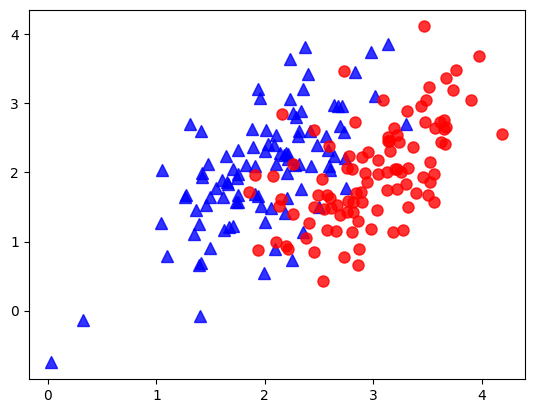

In [83]:
np.random.seed(2)

#preparing data
means = [[2, 2], [3, 2]]
cov = [[.3, .3], [.2, .5]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)

In [84]:
from sklearn.model_selection import train_test_split

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

# concat 1 for bias addition
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

X_train, X_test, y_train, y_test = train_test_split(
    X.T, y.T, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

In [95]:

class Perceptron:
    def __init__(self, w_init):
        self.w = w_init
        self.all_ws = [w_init]
        self.all_miss_points = []

    def activate(self, x):
        return np.sign(np.dot(self.w.T,x))

    def update_w(self, x, y):
        self.w = self.w + y * x

    def check_converged(self, X, y):
        return np.array_equal(self.predict(X), y)

    def evaluate(self, X, y):
        pred = np.sign(np.dot(self.w.T,X))
        return np.sum(pred == y)/X.shape[1]

    def fit(self, X, y, max_iter=100):
        n_samples = X.shape[1]
        for _ in range(max_iter):
          # train the model with random order

          mix_id = np.random.permutation(n_samples)
          for i in range(N):
              xi = X[:, mix_id[i]][..., None]
              yi = y[0, mix_id[i]]
              acc = self.evaluate(X, y)

              if self.activate(xi).item() != yi:
                  self.all_miss_points.append(mix_id[i])
                  self.update_w(xi, yi)
                  self.all_ws.append(self.w)
                  acc = self.evaluate(X, y)
                  print(f'Accuracy: {round(acc*100,2)}%')

          if  acc == 1:
              print('model has converged')
              break
        return (self.all_ws, self.all_miss_points)



In [96]:
d = X.shape[0]
model = Perceptron(w_init=np.zeros((d, 1)))
w, m = model.fit(X_train, y_train)

Accuracy: 50.62%
Accuracy: 50.62%
Accuracy: 49.38%
Accuracy: 50.62%
Accuracy: 50.62%
Accuracy: 50.62%
Accuracy: 57.5%
Accuracy: 49.38%
Accuracy: 50.62%
Accuracy: 49.38%
Accuracy: 50.62%
Accuracy: 49.38%
Accuracy: 51.88%
Accuracy: 52.5%
Accuracy: 49.38%
Accuracy: 77.5%
Accuracy: 49.38%
Accuracy: 79.38%
Accuracy: 49.38%
Accuracy: 59.38%
Accuracy: 50.0%
Accuracy: 61.88%
Accuracy: 63.75%
Accuracy: 50.62%
Accuracy: 70.0%
Accuracy: 51.25%
Accuracy: 68.75%
Accuracy: 58.75%
Accuracy: 51.25%
Accuracy: 54.37%
Accuracy: 76.25%
Accuracy: 51.25%
Accuracy: 75.0%
Accuracy: 51.25%
Accuracy: 84.38%
Accuracy: 49.38%
Accuracy: 73.12%
Accuracy: 52.5%
Accuracy: 70.0%
Accuracy: 51.25%
Accuracy: 66.88%
Accuracy: 51.88%
Accuracy: 60.0%
Accuracy: 83.75%
Accuracy: 49.38%
Accuracy: 79.38%
Accuracy: 51.25%
Accuracy: 51.25%
Accuracy: 83.12%
Accuracy: 49.38%
Accuracy: 80.62%
Accuracy: 72.5%
Accuracy: 51.25%
Accuracy: 69.38%
Accuracy: 49.38%
Accuracy: 72.5%
Accuracy: 50.62%
Accuracy: 72.5%
Accuracy: 53.75%
Accuracy:

In [97]:
model.evaluate(X_test, y_test)*100

95.0

#Visualization

In [90]:
# def draw_line(w):
#     w0, w1, w2 = w[0], w[1], w[2]
#     if w2 != 0:
#         x11, x12 = -100, 100
#         return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
#     else:
#         x10 = -w0/w1
#         return plt.plot([x10, x10], [-100, 100], 'k')


# def viz_alg_1d_2(w ):
#     it = len(w)
#     fig, ax = plt.subplots(figsize=(5, 5))

#     def update(i):
#         ani = plt.cla()
#         #points
#         ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
#         ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
#         ani = plt.axis([0 , 6, -2, 4])
#         i2 =  i if i < it else it-1
#         ani = draw_line(w[i2])
#         if i < it-1:
#             # draw one  misclassified point
#             circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
#             ax.add_artist(circle)
#         # hide axis
#         cur_axes = plt.gca()
#         cur_axes.axes.get_xaxis().set_ticks([])
#         cur_axes.axes.get_yaxis().set_ticks([])

#         label = 'PLA: iter %d/%d' %(i2, it-1)
#         ax.set_xlabel(label)
#         return ani, ax

#     anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=200)
#     # save
#     anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
#     plt.show()

In [91]:
# viz_alg_1d_2(w)

# Voting Perceptron


# Average Perceptron

In [98]:

class AveragePerceptron:
    def __init__(self, w_init):
        self.w = w_init
        self.w_avg = w_init
        self.all_ws = [w_init]
        self.all_miss_points = []
        self.c = 1


    def evaluate(self, X, y):
        w = self.w - self.w_avg/self.c
        pred = np.sign(np.dot(w.T,X))
        return np.sum(pred == y)/X.shape[1]

    def activate(self, x):
        return np.sign(np.dot(self.w.T,x))

    def update_w(self, x, y):
        self.w = self.w + y * x
        self.w_avg = self.w_avg + self.c * y * x



    def fit(self, X, y, max_iter=1000):
        n_samples = X.shape[1]
        num_update = 0
        for _ in range(max_iter):
          mix_id = np.random.permutation(n_samples)
          for i in range(N):
              xi = X[:, mix_id[i]].reshape(3,1)
              yi = y[0, mix_id[i]]

              if self.activate(xi).item() != yi:
                  num_update += 1
                  self.all_miss_points.append(mix_id[i])
                  self.update_w(xi, yi)
                  self.all_ws.append(self.w)
                  acc = self.evaluate(X, y)
                  print(f'Accuracy: {round(acc*100,2)}%')

              self.c = self.c + 1

          if self.evaluate(X, y) == 1:
              print(f'model has converged after {num_update} iterations')
              break

        return (self.all_ws, self.all_miss_points)



In [99]:
d = X.shape[0]
model = AveragePerceptron(w_init=np.zeros((d, 1)))
w, m = model.fit(X, y)

Streaming output truncated to the last 5000 lines.
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accuracy: 88.0%
Accur

In [100]:
model.evaluate(X_test, y_test)*100

97.5

#XOR problem

<ipython-input-15-c1dec0b1ea09>:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X0 = np.random.multivariate_normal(means[0], cov, N).T
<ipython-input-15-c1dec0b1ea09>:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal(means[1], cov, N).T


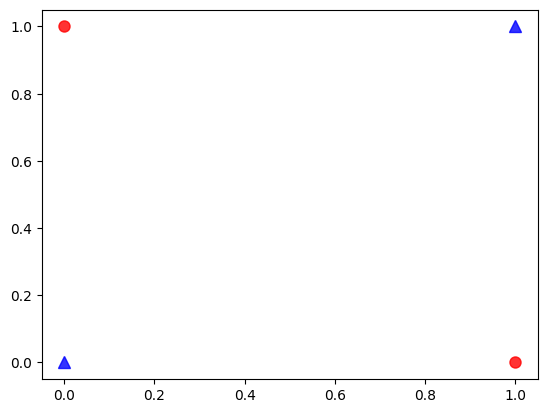

In [15]:
np.random.seed(2)

#preparing data
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X0 = np.array([[0,1], [0,1]])
X1 = np.array([[1,0], [0,1]])
plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)